<a href="https://colab.research.google.com/github/freedom-780/Telemedicine_data_story/blob/main/telemedicine_data_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TeleMedicine Trends

### Introduction

COVID 19 saw increasing use of telemedicine for various service providers. Many insurance companies began to support such options.
Today, virtual health care as is expanding to provide cheaper alternatives to healthcare and able to tap into new health data like 
fitbit data, etc. 

The current dataset is the results of a 20 question survey about the percentage of people surveyed in the given time period and the percentage they used they used 
the service(https://data.cdc.gov/NCHS/Telemedicine-Use-in-the-Last-4-Weeks/h7xa-837u). The goal is to explore the dataset and learn more about the users for further analysis. 


### Questions

* What is the difference in trends over time of the number children who used telehealth versus addults?
* What is the difference in subcategories/groups and average percentage using telemedicine?

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Ingest 

In [ ]:
df = pd.read_csv('Telemedicine_Use_in_the_Last_4_Weeks.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.sample(10)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
2587,Adults Who Had Appointment with Health Profess...,By State,Maine,Maine,3.4,44,"Mar 30 - Apr 11, 2022",3/30/2022,4/11/2022,21.9,16.5,28.1,16.5 - 28.1,19.5-23.0,NaN
2113,Households With Children Where Any Child Had A...,By Education of adult respondent,United States,High school diploma or GED or lower,3.3,41,"Dec 29, 2021 - Jan 10, 2022",12/29/2021,1/10/2022,14.7,12.8,16.7,12.8 - 16.7,NaN,NaN
2378,Adults Who Had Appointment with Health Profess...,By Sexual orientation,United States,Gay or lesbian,3.4,43,"Mar 2 - Mar 14, 2022",3/2/2022,3/14/2022,29.0,24.9,33.4,24.9 - 33.4,NaN,NaN
201,Adults Who Had Appointment with Health Profess...,By State,North Dakota,North Dakota,3.1,29,"Apr 28 - May 10, 2021",4/28/2021,5/10/2021,16.8,12.6,21.8,12.6 - 21.8,14.6-20.5,NaN
1571,Adults Who Had Appointment with Health Profess...,By State,Hawaii,Hawaii,3.2,38,"Sep 15 - Sep 27, 2021",9/15/2021,9/27/2021,24.5,20.2,29.2,20.2 - 29.2,22.8-29.1,NaN
2009,Households With Children Where Any Child Had A...,By State,Montana,Montana,3.3,40,"Dec 1 - Dec 13, 2021",12/1/2021,12/13/2021,16.6,9.0,26.9,9.0 - 26.9,14.9-17.0,NaN
375,Households With Children Where Any Child Had A...,By Health insurance of adult respondent,United States,Private only,3.1,30,"May 12 - May 24, 2021",5/12/2021,5/24/2021,23.8,22.5,25.2,22.5 - 25.2,NaN,NaN
2052,Adults Who Had Appointment with Health Profess...,By Race/Hispanic ethnicity,United States,"Non-Hispanic Black, single race",3.3,41,"Dec 29, 2021 - Jan 10, 2022",12/29/2021,1/10/2022,22.2,20.3,24.3,20.3 - 24.3,NaN,NaN
1427,Adults Who Had Appointment with Health Profess...,By State,Massachusetts,Massachusetts,3.2,37,"Sep 1 - Sep 13, 2021",9/1/2021,9/13/2021,29.4,25.6,33.4,25.6 - 33.4,22.1-29.4,NaN
936,Adults Who Had Appointment with Health Profess...,By State,Hawaii,Hawaii,3.2,34,"Jul 21 - Aug 2, 2021",7/21/2021,8/2/2021,27.2,21.8,33.2,21.8 - 33.2,21.2-28.4,NaN


In [ ]:
df.Indicator.value_counts()

Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks                                  1698
Households With Children Where Any Child Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks    1646
Name: Indicator, dtype: int64

need to remap this long text 

In [ ]:
dict = {"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks": 1, 
        "Households With Children Where Any Child Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks": 0
       }

In [ ]:
df['Indicator'] = df['Indicator'].map(dict)
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,1,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",4/14/2021,4/26/2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN
1,1,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",4/14/2021,4/26/2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN
2,1,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",4/14/2021,4/26/2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN
3,1,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",4/14/2021,4/26/2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN
4,1,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",4/14/2021,4/26/2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN


In [ ]:
df.Group.value_counts(normalize=True)

By State                                                                              0.640550
By Total household income                                                             0.067285
By Age                                                                                0.052333
By Race/Hispanic ethnicity                                                            0.037380
By Race/Hispanic ethnicity of adult respondent                                        0.037380
By Education                                                                          0.029904
By Education of adult respondent                                                      0.022428
By Health insurance of adult respondent                                               0.022428
By Gender identity                                                                    0.015251
By Sexual orientation                                                                 0.015251
National Estimate                                 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               3344 non-null   int64  
 1   Group                   3344 non-null   object 
 2   State                   3344 non-null   object 
 3   Subgroup                3344 non-null   object 
 4   Phase                   3344 non-null   float64
 5   Time Period             3344 non-null   int64  
 6   Time Period Label       3344 non-null   object 
 7   Time Period Start Date  3344 non-null   object 
 8   Time Period End Date    3344 non-null   object 
 9   Value                   3104 non-null   float64
 10  Low CI                  3104 non-null   float64
 11  High CI                 3104 non-null   float64
 12  Confidence Interval     3104 non-null   object 
 13  Quartile Range          2142 non-null   object 
 14  Suppression Flag        52 non-null     

In [ ]:
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               3344 non-null   int64         
 1   Group                   3344 non-null   object        
 2   State                   3344 non-null   object        
 3   Subgroup                3344 non-null   object        
 4   Phase                   3344 non-null   float64       
 5   Time Period             3344 non-null   int64         
 6   Time Period Label       3344 non-null   object        
 7   Time Period Start Date  3344 non-null   datetime64[ns]
 8   Time Period End Date    3344 non-null   object        
 9   Value                   3104 non-null   float64       
 10  Low CI                  3104 non-null   float64       
 11  High CI                 3104 non-null   float64       
 12  Confidence Interval     3104 non-null   object  

need to change "Time Period Start Date" to datatime formate

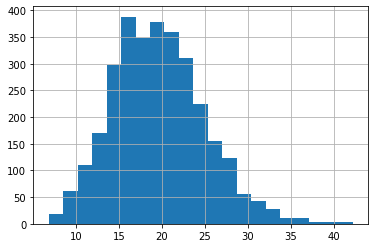

In [ ]:
df['Value'].hist(bins=21);

#### What is the difference in trends over time of the number children who used telemedicine versus adults?

Text(0.5, 1.0, 'Line Chart of Adults vs. Kid TeleMedicine Use')

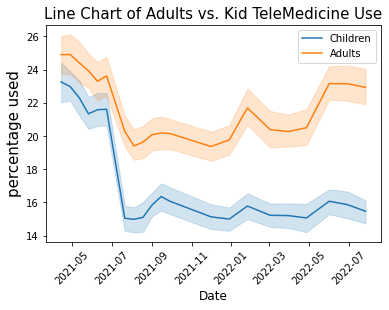

In [ ]:
sns.lineplot(x="Time Period Start Date", y='Value', data=df, 
             hue = 'Indicator')
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("percentage used", size=15)
plt.legend(labels=['Children', 'Adults'])
plt.title("Line Chart of Adults vs. Kid TeleMedicine Use", size=15)

#### What is the difference in subcategories/groups and average percentage using telemedicine?

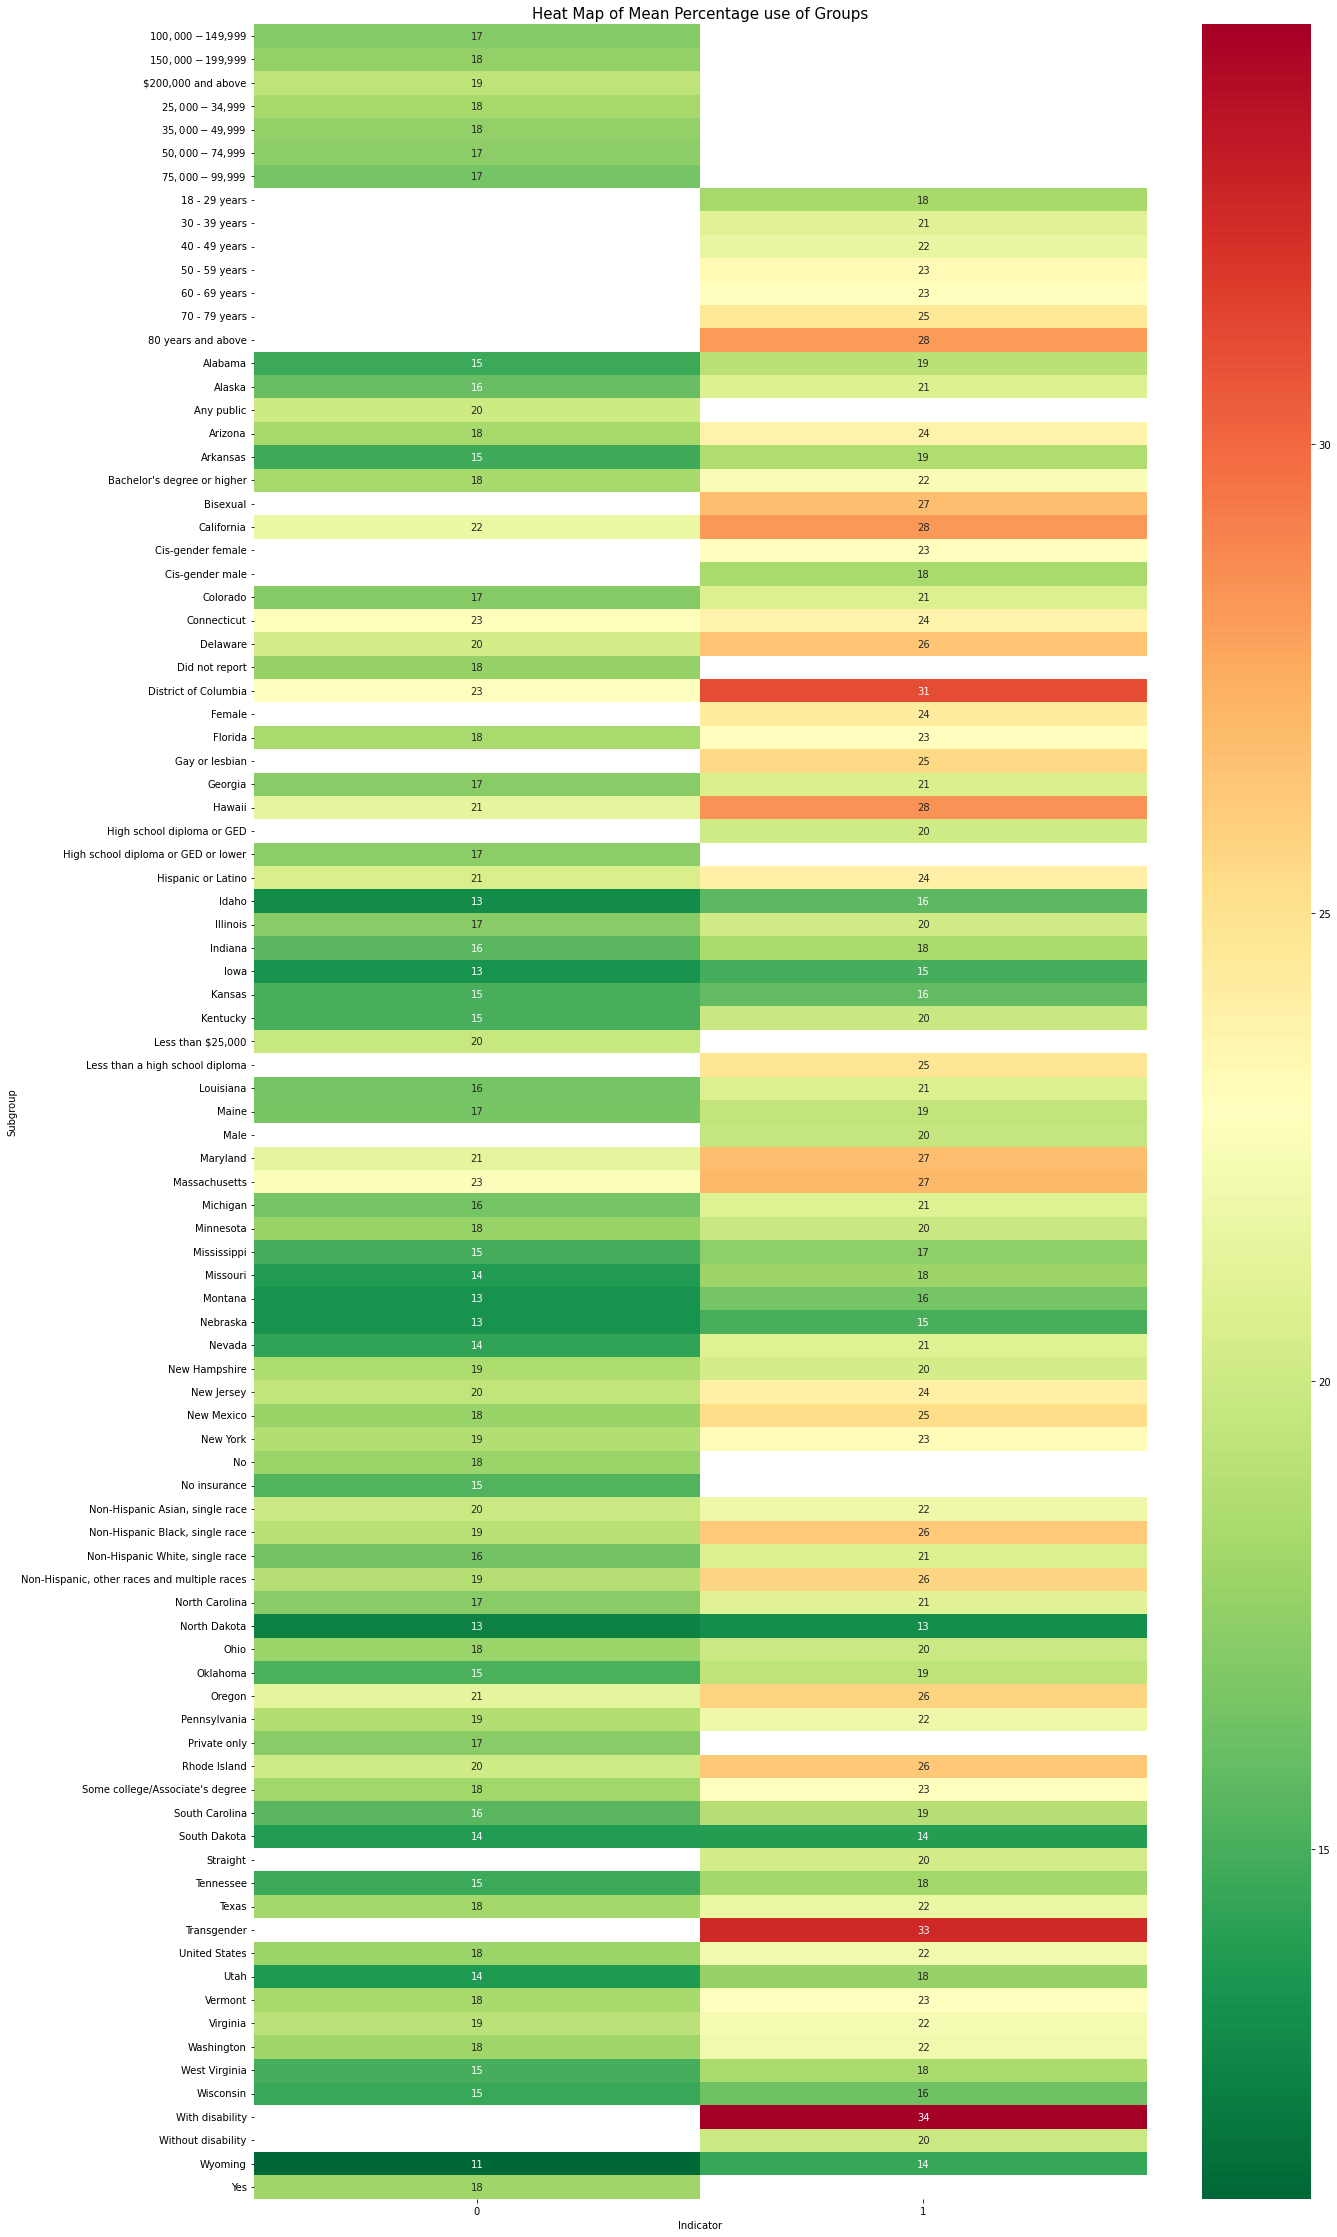

In [ ]:
plt.figure(figsize=[20,40])

sns.heatmap(df.groupby(['Indicator','Subgroup']) \
['Value'].agg('mean').unstack('Indicator'),cmap='RdYlGn_r',annot=True)
plt.title("Heat Map of Mean Percentage use of Groups", size=15);

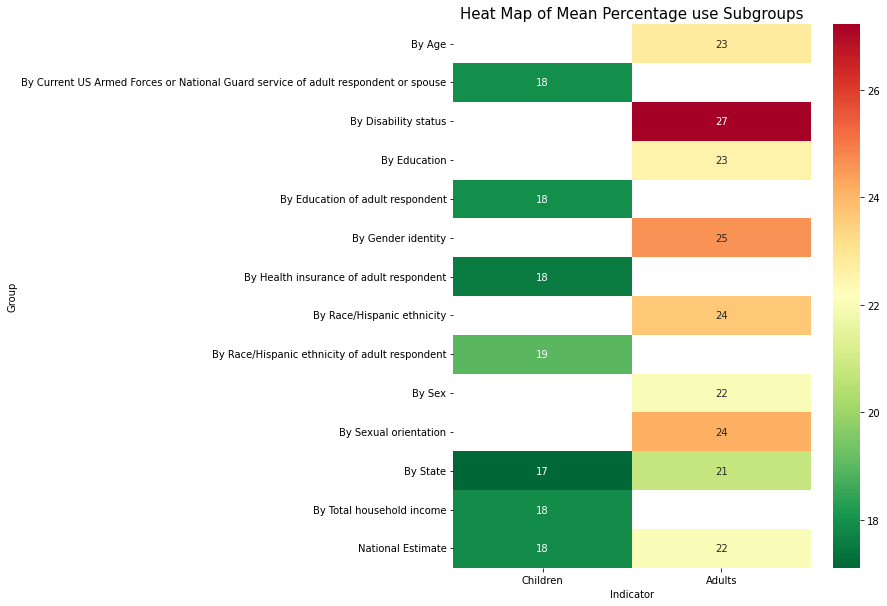

In [ ]:
plt.figure(figsize=[8,10])

sns.heatmap(df.groupby(['Indicator','Group']) \
['Value'].agg('mean').unstack('Indicator'),cmap='RdYlGn_r',annot=True ,xticklabels = ['Children', 'Adults'])
plt.title("Heat Map of Mean Percentage use Subgroups", size=15);

### Conclusion 

1. Overall the adult trends in telemedicine use show a sharp increase especially from 2021, but shows signs of leveling off.
2. The highest Groups on telemedicine use overall are for adult use: Disability status, Gender Identity, Race, and sexual orientation.
3. Subgroups show a more detailed picuture: those that have a disability, are transgender/bisexual, states like Rhode island, Oregon & California, and 80 years & above.

### Areas to Further explore 

* Explore the services used and quality of care.
* Explore the time spent on telemedicine calls.
* Investigate trends of the number of users over time.


